<a href="https://colab.research.google.com/github/ValerieLangat/DS-Project-2---Predictive-Modeling/blob/master/Copy_of_dialing_back_as_simple_as_possible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install category_encoders

     |████████████████████████████████| 92kB 3.5MB/s 


In [0]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred)) 

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/ValerieLangat/DS-Project-2---Predictive-Modeling/master/efw_cc.csv')
data = data.drop(["rank", "quartile"], axis=1)
data = data.dropna(thresh=17)

In [0]:
data.rename(columns = {'ECONOMIC FREEDOM':'ECONOMIC_FREEDOM'}, inplace = True)

In [5]:
data.head(2)

,year,ISO_code,countries,ECONOMIC_FREEDOM,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,2b_impartial_courts,2c_protection_property_rights,2d_military_interference,2e_integrity_legal_system,2f_legal_enforcement_contracts,2g_restrictions_sale_real_property,2h_reliability_police,2i_business_costs_crime,2j_gender_adjustment,2_property_rights,3a_money_growth,3b_std_inflation,3c_inflation,3d_freedom_own_foreign_currency,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,1990.0,ALB,Albania,1.97,8.232353,7.509902,8.0,8.0,7.935564,2.668222,3.145462,4.512228,8.333333,4.166667,4.387444,6.485287,6.933500,6.215401,0.948718,5.071814,8.986454,9.484575,9.74360,10.0,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,1990.0,DZA,Algeria,2.47,2.150000,7.817129,0.0,4.5,3.616782,4.186704,4.327113,4.689952,4.166667,5.000000,4.507538,6.626692,6.136845,6.737383,0.820513,4.690743,6.955962,8.339152,8.72046,5.0,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992


In [0]:
asia = ['CXR', 'LKA', 'LBN', 'TLS', 'CYP', 'BRN', 'PHL', 'MMR', 'GEO', 'KHM', 'JOR', 'ARE', 'IOT',
        'KGZ', 'IRN', 'SAU', 'RUS', 'YEM', 'SGP', 'OMN', 'THA', 'IDN', 'CCK', 'AZE', 'HKG', 'AFG', 'KAZ', 'PRK', 'PAK', 'TUR', 
        'QAT', 'CHN', 'UZB', 'MDV', 'ARM', 'BHR', 'KOR', 'SYR', 'LAO', 'BGD', 'VNM', 'IRQ', 'PSE', 'MNG', 'IND', 'BTN', 'ISR',
         'NPL', 'TWN', 'KWT', 'TJK', 'JPN', 'MAC', 'TKM', 'MYS']

africa = ['SEN', 'SOM', 'GNQ', 'TZA', 'CMR', 'DJI', 'CAF', 'MLI', 'ZWE', 'RWA', 'NAM', 'GIN', 'NER', 'SYC', 'MAR', 'DZA', 'MUS',
           'ERI', 'MOZ', 'BDI', 'SWZ', 'SDN', 'AGO', 'GHA', 'SSD', 'COG', 'LSO','MYT', 'SHN', 'EGY', 'NGA', 'CPV','BFA', 'SLE',
           'GNB', 'MRT', 'ESH', 'ETH', 'COM', 'ZAF', 'MDG', 'TGO', 'TUN', 'TCD', 'GMB', 'ZMB', 'STP', 'CIV', 'REU', 'COD', 'UGA',
           'LBY', 'LBR', 'MWI', 'GAB', 'BWA', 'BEN', 'KEN']

europe = ['CYP', 'MLT', 'ISL', 'SVN', 'FRO', 'LIE', 'LTU', 'AND', 'FRA', 'FIN', 'ALB', 'NLD', 'BLR', 'DEU', 'BEL', 'SJM', 'NOR',
          'MKD', 'LVA', 'AZE', 'ALA', 'MCO', 'ESP', 'GIB', 'IMN', 'POL', 'SWE', 'GEO', 'LUX', 'ROU', 'PRT', 'ARM', 'SVK', 'ITA',
          'MDA', 'DNK', 'CHE', 'UKR', 'HRV', 'TUR', 'VAT', 'BIH', 'HUN', 'CZE', 'AUT', 'JEY', 'GRC', 'RUS', 'BGR', 'SMR', 'MNE',
          'KAZ', 'IRL', 'GBR', 'GGY', 'EST', 'SRB']

n_america = ['CRI', 'JAM', 'ANT', 'DMA', 'TCA', 'KNA', 'MSR', 'HND', 'PRI', 'VIR', 'SPM', 'DOM', 'GRL', 'ATG', 'CAN', 'HTI', 'UMI',
             'MTQ', 'GRD', 'VGB', 'SLV', 'CUB', 'MAF', 'AIA', 'SXM', 'GTM', 'GLP', 'USA', 'NIC', 'BLM', 'BMU', 'LCA', 'BES', 'BHS',
             'BRB', 'BLZ', 'CYM', 'CUW', 'PAN', 'ABW', 'MEX', 'VCT', 'TTO']


s_america = ['ARG', 'ECU', 'GUY', 'GUF', 'PRY', 'BOL', 'COL', 'CHL', 'FLK', 'VEN', 'URY', 'BRA', 'SUR', 'PER']

In [7]:
def GetConti(country):
    if country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in africa:
        return "Africa"
    elif country in n_america:
        return "N_America"
    elif country in s_america:
        return "S_America"
    else:
        return "other"

data['Continent'] = data['ISO_code'].apply(lambda x: GetConti(x))
data

,year,ISO_code,countries,ECONOMIC_FREEDOM,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,2b_impartial_courts,2c_protection_property_rights,2d_military_interference,2e_integrity_legal_system,2f_legal_enforcement_contracts,2g_restrictions_sale_real_property,2h_reliability_police,2i_business_costs_crime,2j_gender_adjustment,2_property_rights,3a_money_growth,3b_std_inflation,3c_inflation,3d_freedom_own_foreign_currency,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation,Continent
0,1990.0,ALB,Albania,1.97,8.232353,7.509902,8.0,8.0,7.935564,2.668222,3.145462,4.512228,8.333333,4.166667,4.387444,6.485287,6.933500,6.215401,0.948718,5.071814,8.986454,9.484575,9.743600,10.0,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901,Europe
1,1990.0,DZA,Algeria,2.47,2.150000,7.817129,0.0,4.5,3.616782,4.186704,4.327113,4.689952,4.166667,5.000000,4.507538,6.626692,6.136845,6.737383,0.820513,4.690743,6.955962,8.339152,8.720460,5.0,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992,Africa
2,1990.0,AGO,Angola,2.66,7.600000,8.886739,0.0,9.5,6.496685,1.843129,1.974566,2.512364,3.333333,4.166667,2.302200,5.455882,3.016104,4.291197,0.846154,2.963635,9.385679,4.986742,3.054000,5.0,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500,Africa
3,1990.0,ARG,Argentina,2.71,5.335294,6.048930,6.0,4.0,5.346056,3.689690,2.930563,4.255995,7.500000,3.333333,3.632872,6.857195,3.385786,4.133832,0.769231,3.904030,5.233264,5.224079,2.000000,10.0,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019,S_America
4,1990.0,ARM,Armenia,2.74,7.264706,7.748532,8.0,5.0,7.003310,3.867379,4.197569,5.664317,5.833333,5.000000,5.196693,9.801963,5.714028,7.007654,1.000000,5.809215,9.078264,9.263496,9.746000,10.0,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069,Asia
5,1990.0,AUS,Australia,2.75,4.511765,6.664948,10.0,5.0,6.544178,8.766929,5.610653,7.998304,10.000000,9.166667,6.025331,8.205655,8.707445,6.790183,1.000000,7.919019,8.564838,9.500704,9.744620,10.0,9.452540,8.820000,7.427103,10.00000,3.859781,7.526721,9.576358,7.698589,8.121631,8.465526,other
6,1990.0,AUT,Austria,2.83,3.744118,3.101062,10.0,3.5,5.086295,7.650855,5.482200,8.092565,10.000000,10.000000,6.220993,8.100494,8.501867,7.194909,1.000000,7.915987,8.033869,9.875451,9.822000,10.0,9.432830,8.266133,8.254011,10.00000,5.906786,8.106733,9.129015,5.565118,7.419870,7.371334,Europe
7,1990.0,AZE,Azerbaijan,2.84,6.320588,7.881208,0.0,6.5,5.175449,5.676886,5.861119,6.321836,5.000000,5.833333,7.252962,9.830312,6.170495,7.280192,0.717949,5.652732,9.240398,6.649350,9.164200,5.0,7.513487,7.973778,6.799052,10.00000,4.093268,7.216525,7.467778,6.076782,7.080078,6.874880,Asia
8,1990.0,BHS,Bahamas,2.87,7.085294,9.040503,7.0,10.0,8.281449,NaN,6.700000,NaN,10.000000,6.666667,4.699257,6.149350,NaN,NaN,0.945946,6.658107,8.654101,8.975514,9.930800,0.0,6.890104,3.253067,8.105925,10.00000,5.384615,6.685902,8.622733,8.361606,7.523034,8.169125,N_America
9,1990.0,BHR,Bahrain,2.88,3.688235,9.581704,10.0,10.0,8.317485,6.822563,6.231401,7.435713,5.000000,7.500000,4.785814,8.855315,7.764706,7.287250,0.536585,5.265602,9.961596,8.215418,9.440400,10.0,9.404353,8.523200,6.295595,10.00000,4.794819,7.403403,7.609167,6.619418,8.018774,7.415786,Asia


In [0]:
max_cardinality = 80
high_cardinality = [col for col in data.select_dtypes(exclude=np.number)
                   if data[col].nunique() > max_cardinality]

data = data.drop(columns=high_cardinality)

In [9]:
pip install fancyimpute

In [10]:
from fancyimpute import KNN

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [0]:
feats = ['year', '1a_government_consumption', '1c_gov_enterprises', '1d_top_marg_tax_rate', '2a_judicial_independence', '3c_inflation',
'3d_freedom_own_foreign_currency', '4a_tariffs', '4c_black_market', '4d_control_movement_capital_ppl', '5a_credit_market_reg', '5b_labor_market_reg']

X = data[feats]

In [12]:
numeric_cols = list(X)
numeric_cols

['year',
 '1a_government_consumption',
 '1c_gov_enterprises',
 '1d_top_marg_tax_rate',
 '2a_judicial_independence',
 '3c_inflation',
 '3d_freedom_own_foreign_currency',
 '4a_tariffs',
 '4c_black_market',
 '4d_control_movement_capital_ppl',
 '5a_credit_market_reg',
 '5b_labor_market_reg']

In [13]:
numeric = X.select_dtypes(include=[np.float]).as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [14]:
filled = pd.DataFrame(KNN(3).fit_transform(numeric))

Imputing row 1/2611 with 0 missing, elapsed time: 1.175
Imputing row 101/2611 with 0 missing, elapsed time: 1.177
Imputing row 201/2611 with 0 missing, elapsed time: 1.178
Imputing row 301/2611 with 0 missing, elapsed time: 1.179
Imputing row 401/2611 with 1 missing, elapsed time: 1.180
Imputing row 501/2611 with 1 missing, elapsed time: 1.181
Imputing row 601/2611 with 0 missing, elapsed time: 1.182
Imputing row 701/2611 with 0 missing, elapsed time: 1.183
Imputing row 801/2611 with 0 missing, elapsed time: 1.184
Imputing row 901/2611 with 0 missing, elapsed time: 1.184
Imputing row 1001/2611 with 0 missing, elapsed time: 1.186
Imputing row 1101/2611 with 0 missing, elapsed time: 1.187
Imputing row 1201/2611 with 0 missing, elapsed time: 1.188
Imputing row 1301/2611 with 0 missing, elapsed time: 1.190
Imputing row 1401/2611 with 0 missing, elapsed time: 1.191
Imputing row 1501/2611 with 0 missing, elapsed time: 1.192
Imputing row 1601/2611 with 1 missing, elapsed time: 1.194
Imputing 

In [0]:
filled.columns = numeric_cols

In [16]:
filled

,year,1a_government_consumption,1c_gov_enterprises,1d_top_marg_tax_rate,2a_judicial_independence,3c_inflation,3d_freedom_own_foreign_currency,4a_tariffs,4c_black_market,4d_control_movement_capital_ppl,5a_credit_market_reg,5b_labor_market_reg
0,1990.0,8.232353,8.000000,8.000000,2.668222,9.743600,10.000000,8.963556,10.00000,6.406138,7.098562,6.916278
1,1990.0,2.150000,0.000000,4.500000,4.186704,8.720460,5.000000,6.872533,5.56391,1.590362,5.100509,5.029513
2,1990.0,7.600000,0.000000,9.500000,1.843129,3.054000,5.000000,6.989244,10.00000,2.044823,7.064905,4.560325
3,1990.0,5.335294,6.000000,4.000000,3.689690,2.000000,10.000000,6.421600,0.00000,4.697482,5.419820,5.151405
4,1990.0,7.264706,8.000000,5.000000,3.867379,9.746000,10.000000,8.547556,10.00000,6.830998,9.102046,6.234630
5,1990.0,4.511765,10.000000,5.000000,8.766929,9.744620,10.000000,8.820000,10.00000,3.859781,9.576358,7.698589
6,1990.0,3.744118,10.000000,3.500000,7.650855,9.822000,10.000000,8.266133,10.00000,5.906786,9.129015,5.565118
7,1990.0,6.320588,0.000000,6.500000,5.676886,9.164200,5.000000,7.973778,10.00000,4.093268,7.467778,6.076782
8,1990.0,7.085294,7.000000,10.000000,5.971826,9.930800,0.000000,3.253067,10.00000,5.384615,8.622733,8.361606
9,1990.0,3.688235,10.000000,10.000000,6.822563,9.440400,10.000000,8.523200,10.00000,4.794819,7.609167,6.619418


In [17]:
filled['Continent'] = data.Continent
filled.isna().sum()

year                                 0
1a_government_consumption            0
1c_gov_enterprises                   0
1d_top_marg_tax_rate                 0
2a_judicial_independence             0
3c_inflation                         0
3d_freedom_own_foreign_currency      0
4a_tariffs                           0
4c_black_market                      0
4d_control_movement_capital_ppl      0
5a_credit_market_reg                 0
5b_labor_market_reg                  0
Continent                          294
dtype: int64

In [0]:
filled = filled.fillna('Unknown')

In [19]:
filled.isna().sum()

year                               0
1a_government_consumption          0
1c_gov_enterprises                 0
1d_top_marg_tax_rate               0
2a_judicial_independence           0
3c_inflation                       0
3d_freedom_own_foreign_currency    0
4a_tariffs                         0
4c_black_market                    0
4d_control_movement_capital_ppl    0
5a_credit_market_reg               0
5b_labor_market_reg                0
Continent                          0
dtype: int64

In [0]:
filled.replace({'Asia': 1, 'Europe': 2, 'Africa': 3, 'N_America': 4, 'S_America': 5, 'other': 6, 'Unknown': 7}, inplace=True)

In [25]:
filled.head()

,year,1a_government_consumption,1c_gov_enterprises,1d_top_marg_tax_rate,2a_judicial_independence,3c_inflation,3d_freedom_own_foreign_currency,4a_tariffs,4c_black_market,4d_control_movement_capital_ppl,5a_credit_market_reg,5b_labor_market_reg,Continent
0,1990.0,8.232353,8.0,8.0,2.668222,9.74360,10.0,8.963556,10.00000,6.406138,7.098562,6.916278,2
1,1990.0,2.150000,0.0,4.5,4.186704,8.72046,5.0,6.872533,5.56391,1.590362,5.100509,5.029513,3
2,1990.0,7.600000,0.0,9.5,1.843129,3.05400,5.0,6.989244,10.00000,2.044823,7.064905,4.560325,3
3,1990.0,5.335294,6.0,4.0,3.689690,2.00000,10.0,6.421600,0.00000,4.697482,5.419820,5.151405,5
4,1990.0,7.264706,8.0,5.0,3.867379,9.74600,10.0,8.547556,10.00000,6.830998,9.102046,6.234630,1


continue down

In [0]:
features = ['year', '1a_government_consumption', '1c_gov_enterprises', '1d_top_marg_tax_rate', '2a_judicial_independence', '3c_inflation',
'3d_freedom_own_foreign_currency', '4a_tariffs', '4c_black_market', '4d_control_movement_capital_ppl', '5a_credit_market_reg', '5b_labor_market_reg', 'Continent']

X = filled[features]
y = data['ECONOMIC_FREEDOM']

In [0]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

X = scale(X) 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept:', linreg.intercept_)

r_sq = linreg.score(X, y)
print('Coefficient of Determination:', r_sq)

Intercept: 6.410871002298579
Coefficient of Determination: 0.9773411233999951


In [34]:
list(zip(features, linreg.coef_))

[('year', 1.1363184296382216),
 ('1a_government_consumption', 0.009471028446108452),
 ('1c_gov_enterprises', 0.004133254203132204),
 ('1d_top_marg_tax_rate', -0.011504653571074486),
 ('2a_judicial_independence', 0.0010437254903662716),
 ('3c_inflation', -0.004157063927218514),
 ('3d_freedom_own_foreign_currency', 0.0384421044242522),
 ('4a_tariffs', -0.01429275432555901),
 ('4c_black_market', 0.0006312963276971981),
 ('4d_control_movement_capital_ppl', -0.03487145495404269),
 ('5a_credit_market_reg', 0.010456948654249835),
 ('5b_labor_market_reg', 0.014119229287225959),
 ('Continent', -0.003332630107313827)]

In [0]:
y_pred = linreg.predict(X_test)
y_pred

In [32]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.16928001771050033


In [33]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.1260257694689298
0.028655724396067304
0.16928001771050033


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
sns.pairplot(filled, x_vars=['Continent','5b_labor_market_reg','2a_judicial_independence'], y_vars= y, height=7, aspect=0.7, kind='reg')

KeyboardInterrupt: ignored

ValueError: ignored

<Figure size 1058.4x1.31594e+06 with 3009 Axes>

In [48]:
X_train.shape

(1958, 13)

In [49]:
y_train.shape

(1958,)

ValueError: ignored

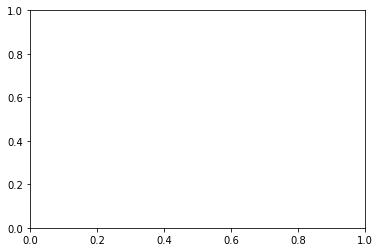

In [45]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, linreg.predict(X_train), color = 'blue')
plt.title('Feature vs IDKanymore (Training set)')
plt.xlabel('mind is blank' ')
plt.ylabel('Temperature by sean paul')
plt.show()

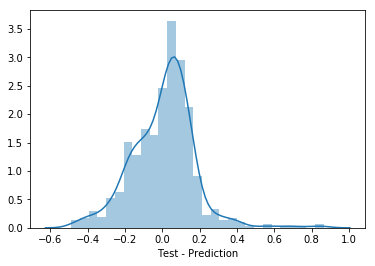

In [53]:
sns.distplot(y_test - y_pred, axlabel="Test - Prediction")
plt.show()

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)


#train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
#RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [0]:
print(utils.multiclass.type_of_target(trainingScores))
print(training_scores_encoded)
print(utils.multiclass.type_of_target(training_scores_Y))
print(utils.multiclass.type_of_target(training_scores_Y.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))